In [1]:
import numpy as np
from collections import Counter
import collections
import math
import os
import random
from multiprocessing import Queue, Process
from Bio import SeqIO
import matplotlib.pyplot as plt

In [17]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7
 

In [29]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_4_15.fasta'

max_length = 512

dat_thermo = {'id':[], 'ogt':[], 'seq':[]}
dat_meso = {'id':[], 'ogt':[], 'seq':[]}

for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_thermo['id'].append(rec.id)
    dat_thermo['ogt'].append(float(rec.description.split()[-1]))
    dat_thermo['seq'].append(rec.seq)
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_meso['id'].append(rec.id)
    dat_meso['ogt'].append(float(rec.description.split()[-1]))
    dat_meso['seq'].append(rec.seq)

cnt_thermo = Counter()
cnt_meso = Counter()
word_lengt = 2
list_of_ngrams = []
length_sequences_thermo = 0
length_sequences_meso = 0
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_lengt):
        list_of_ngrams += [ str(dat_thermo['seq'][k][i+ofset:i+word_lengt+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_lengt-ofset,word_lengt)]
    length_sequences_thermo += len(str(dat_thermo['seq'][k]))
for word in list_of_ngrams:
    cnt_thermo[word] += 1/length_sequences_thermo
list_of_ngrams = []

for k in range(len(dat_meso['seq'])):
    for ofset in range(word_lengt):        
        list_of_ngrams += [ str(dat_meso['seq'][k][i+ofset:i+word_lengt+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_lengt-ofset,word_lengt)]   
    length_sequences_meso += len(str(dat_meso['seq'][k]))
for word in list_of_ngrams:
    cnt_meso[word] += 1/length_sequences_meso

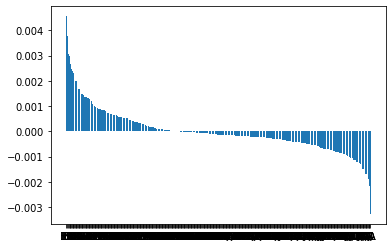

In [30]:
import matplotlib.pyplot as plt

cnt_thermo.subtract(cnt_meso)

x = [i for i in range(0,400)]
hight = [cnt_thermo.most_common(400)[i][1] for i in range(400)]
label = [cnt_thermo.most_common(400)[i][0] for i in range(400)]
plt.bar(x, hight)

plt.xticks(x,label)
plt.show()

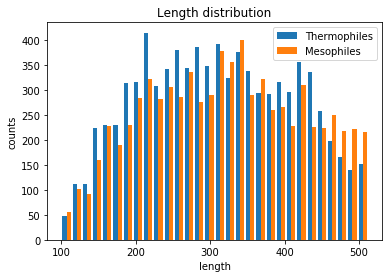

In [2]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_15_26.fasta'

max_length = 512

dat_thermo = {'len':[]}
dat_meso = {'len':[]}

for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_thermo['len'].append(len(str(rec.seq)))
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    dat_meso['len'].append(len(str(rec.seq)))
    
plt.hist([dat_thermo['len'],dat_meso['len']], bins=30)
plt.title('Length distribution')
plt.legend(['Thermophiles', 'Mesophiles'])
plt.xlabel('length')
plt.ylabel('counts')
plt.show()


In [2]:
dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'
file_thermo = 'ogt_70_81.fasta'
file_meso = 'ogt_4_15.fasta'
max_length = 512
dat_thermo = {'id':[], 'ogt':[], 'seq':[]}
dat_meso = {'id':[], 'ogt':[], 'seq':[]}
count_thermo = 0
count_meso = 0
for rec in SeqIO.parse(os.path.join(dir_,file_thermo), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    count_thermo += 1
    dat_thermo['id'].append(rec.id)
    dat_thermo['ogt'].append(float(rec.description.split()[-1]))
    dat_thermo['seq'].append(rec.seq)
    
for rec in SeqIO.parse(os.path.join(dir_,file_meso), 'fasta'):
    if len(str(rec.seq)) > max_length:
        continue
    count_meso += 1
    dat_meso['id'].append(rec.id)
    dat_meso['ogt'].append(float(rec.description.split()[-1]))
    dat_meso['seq'].append(rec.seq)


word_length =1
list_of_ngrams = []
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_length):
        list_of_ngrams += [ str(dat_thermo['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_length-ofset,word_length)]

for k in range(len(dat_meso['seq'])):
    for ofset in range(word_length):        
        list_of_ngrams += [ str(dat_meso['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_length-ofset,word_length)]   

s = set(list_of_ngrams)

dict_index = {key: i for i, key in enumerate(s)}


In [3]:

features_thermo = np.zeros((count_thermo,20**word_length), dtype = np.float32)
features_meso = np.zeros((count_meso,20**word_length), dtype = np.float32)
list_of_ngrams = []
for k in range(len(dat_thermo['seq'])):
    for ofset in range(word_length):
        list_of_ngrams = [ str(dat_thermo['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_thermo['seq'][k])-word_length-ofset,word_length)]
    for key in list_of_ngrams:
        features_thermo[k,dict_index[key]]+=1
    length = len(str(dat_thermo['seq'][k]))
    features_thermo[k,:]/=length
    
    
for k in range(len(dat_meso['seq'])):
    for ofset in range(word_length):        
        list_of_ngrams = [ str(dat_meso['seq'][k][i+ofset:i+word_length+ofset]) for i in range(0,len(dat_meso['seq'][k])-word_length-ofset,word_length)]   
    for key in list_of_ngrams:
        features_meso[k,dict_index[key]]+=1
    length = len(str(dat_meso['seq'][k]))
    features_meso[k,:]/=length    

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X= np.concatenate((features_thermo, features_meso))
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
k

[0.03621714 0.01761239]


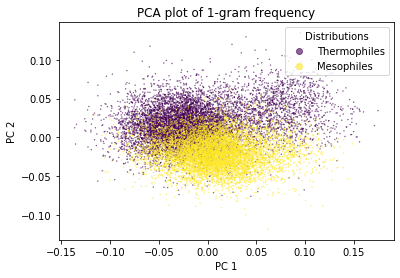

In [5]:
import matplotlib.pyplot as plt
y = np.ones((count_thermo+count_meso,))
y[count_thermo:] = 2

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 0.1)

plt.title('PCA plot of {}-gram frequency'.format(word_length))
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

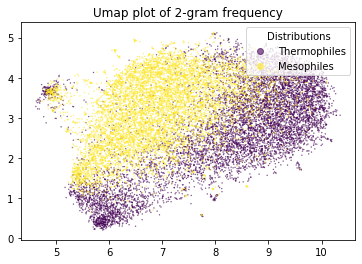

In [8]:
import umap
reducer = umap.UMAP(n_neighbors=100, min_dist = 0.0)
X_umap = reducer.fit_transform(X)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, s = 0.1)
plt.title('Umap plot of {}-gram frequency'.format(word_length))
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend2 = plt.legend(handles, ['Thermophiles', 'Mesophiles'], loc="upper right", title="Distributions")
plt.show()


In [3]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aaindex_file
from quantiprot.metrics.basic import average

file = '/mnt/Archive/Data_Sets/OGT/ogt_70_81.fasta'

# Load data:
seq = load_fasta_file(file)

# Build a feature: average polarity (Grantham, 1974), AAindex entry: GRAR740102:
feat = Feature(get_aaindex_file("GRAR740102")).then(average)

# Add the feature to new feature set:
fs = FeatureSet("my set")
fs.add(feat)

# Process sequences:
res_seq = fs(seq)

# Export average polarities
res = res_seq.columns()
print (res)


[[8.285714285714288, 8.331106870228998, 8.27544642857143, 8.335602094240835, 8.40395833333333, 8.364896755162242, 8.34332925336596, 8.943851508120662, 8.514110429447854, 8.43225, 8.901183431952663, 8.25, 8.234346504559275, 8.48942731277533, 8.668055555555554, 8.476142131979696, 8.345733788395904, 8.476800000000006, 8.599532710280386, 8.537050359712225, 8.502641509433973, 8.20421686746988, 8.232103321033215, 8.39550321199143, 8.315825688073394, 8.649214659685864, 7.379653679653676, 8.469281767955792, 8.59227722772277, 7.438314176245217, 8.475071633237823, 7.364166666666673, 8.35409836065574, 8.292655367231642, 8.281226053639854, 8.344802867383512, 8.237956204379563, 8.285427135678399, 8.330260047281328, 8.354103343465043, 8.065857885615241, 8.399076212471128, 8.506386861313855, 8.489044943820229, 8.482849604221629, 9.05429687500001, 8.13401639344263, 8.353290529695014, 8.471258907363417, 8.628767123287664, 8.43678756476684, 8.495760598503745, 8.47378190255221, 8.411718750000004, 7.46456

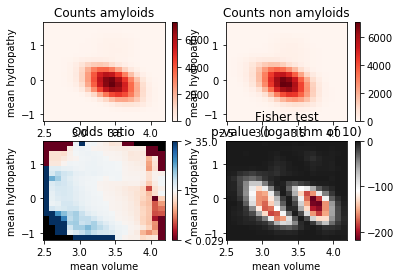

In [5]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aa2volume, get_aa2hydropathy
from quantiprot.metrics.basic import average

file_termo = '/mnt/Archive/Data_Sets/OGT/ogt_70_81.fasta'
file_meso = '/mnt/Archive/Data_Sets/OGT/ogt_4_15.fasta'

# Local Fisher-test related imports:
from quantiprot.analysis.fisher import local_fisher_2d, _plot_local_fisher_2d

from matplotlib import pyplot as plt

# Load sets of amyloidogenic and non-amyloidogenic peptides:
amyload_pos_seq = load_fasta_file(file_termo)
amyload_neg_seq = load_fasta_file(file_meso)

# Calculate quantitive features: volume and hydropathy
mean_volume = Feature(get_aa2volume()).then(average)
mean_hydropathy = Feature(get_aa2hydropathy()).then(average)

fs = FeatureSet("volume'n'hydropathy")
fs.add(mean_volume)
fs.add(mean_hydropathy)

amyload_pos_conv_seq = fs(amyload_pos_seq)
amyload_neg_conv_seq = fs(amyload_neg_seq)

# Do local Fisher:
result = local_fisher_2d(amyload_pos_conv_seq, amyload_neg_conv_seq,
                         windows_per_frame=5, overlap_factor=5)

# Plot local Fisher:
_plot_local_fisher_2d(result, xlabel="mean volume",
                              ylabel="mean hydropathy",
                              pop1_label="amyloids",
                              pop2_label="non amyloids")


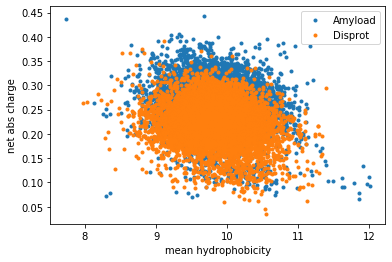

In [15]:
# Uversky plot
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.utils.sequence import compact
from quantiprot.metrics.aaindex import get_aa2charge, get_aa2hydropathy,get_aa2numeric
from quantiprot.metrics.basic import average, average_absolute

from matplotlib import pyplot as plt

amyload_seq = load_fasta_file(file_termo)
disprot_seq = load_fasta_file(file_meso)

# Non-standard letters in Disprot assigned neutral charge and hydropathy:
net_abs_charge = Feature(get_aa2charge(default=0)).then(average_absolute)
mean_hydropathy = Feature(get_aa2hydropathy(default=0)).then(average)
n_amino = Feature(get_aa2numeric(default=0)).then(average_absolute)

uversky_fs = FeatureSet("uversky")
uversky_fs.add(n_amino, name="mean_hydropathy")
uversky_fs.add(net_abs_charge, name="net_abs_charge")

amyload_uversky_seq = uversky_fs(amyload_seq)
disprot_uversky_seq = uversky_fs(disprot_seq)

# First approach to get hydrophobicity/charge pairs
amyload_data_x = amyload_uversky_seq.columns(feature="mean_hydropathy")[0]
amyload_data_y = amyload_uversky_seq.columns(feature="net_abs_charge")[0]
plt.plot(amyload_data_x, amyload_data_y,'.', label="Thermo")

# Second approach to get hydrophobicity/charge pairs
disprot_data = compact(disprot_uversky_seq).columns()
plt.plot(disprot_data[0], disprot_data[1],'.', label="Meso")

plt.xlabel("mean n amino acid")
plt.ylabel("net abs charge")
plt.legend()
plt.show()


In [8]:
import quantiprot.metrics.aaindex as aaidx


In [9]:
help(aaidx)

Help on module quantiprot.metrics.aaindex in quantiprot.metrics:

NAME
    quantiprot.metrics.aaindex

DESCRIPTION
    This module provides functions to generate the Mapping objects based on
    various physico-chemical properties of aminoacids defined in the AAindex
    database. In addition, generators of several common mappings are included.
    
    Functions:
        _parse_aaindex: generate a Mapping for an AAindex entry.
        get_aaindex_file: given an index, generate a Mapping from the AAindex
            flat file.
        get_aaindex_www: given an index, generate a Mapping from the AAindex
            website.
        get_aa2numeric: generate a Mapping from aminoacids to integers.
        get_aa2charge: generate a Mapping from aminoacids to formal charges.
        get_aa2volume: generate a Mapping from aminoacids to van der Waals volumes.
        get_aa2mj: generate a Mapping from aminoacids to the Miyazawa-Jernigan
            hydrophobicity scale.

FUNCTIONS
    get_aa2c

In [14]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.metrics.aaindex import get_aa2hydropathy
from quantiprot.metrics.basic import identity

# Ngram-related imports
from quantiprot.metrics.ngram import pattern_match, pattern_count
from quantiprot.metrics.alphabet import PROTEIN
from quantiprot.analysis.ngram import ngram_count

from matplotlib import pyplot as plt

# Load some data
thermo = load_fasta_file(file_termo)
meso = load_fasta_file(file_meso)

result_freq = ngram_count(termo, n=2)
print (result_freq)


ModuleNotFoundError: No module named 'powerlaw'

In [ ]:
import pandas as pd

FILE "/mnt/Archive/Data_Sets"